In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()


### 1. Load measured metrics

In [2]:
measurements_df = pd.DataFrame(pd.read_json('../results/averaged_metrics_all_data.json', typ='dictionary')).reset_index()
measurements_df = measurements_df.rename({"index": "metric", 0: "value"}, axis=1)
measurements_df["measurement type"] = "ours"
measurements_df.head()

,metric,value,measurement type
0,mean dot product - gradient norm,0.341928,ours
1,mean probes needed - gradient norm,2.460285,ours
2,mean reciprocal rank - gradient norm,0.576541,ours
3,mean dot product - input x gradient,0.025545,ours
4,mean probes needed - input x gradient,2.523162,ours


### 2. Define original metrics computed by authors

In [3]:
original_measurements = {
    "mean dot product - gradient norm": 0.5,
    "mean probes needed - gradient norm": 1.5,
    "mean reciprocal rank - gradient norm": 0.6,
    "mean dot product - input x gradient": 0.15,
    "mean probes needed - input x gradient": 1.26,
    "mean reciprocal rank - input x gradient": 0.64,
    "mean dot product - input erasure": 0.27,
    "mean probes needed - input erasure": 1.18,
    "mean reciprocal rank - input erasure": 0.65,
}
original_measurements_df = pd.DataFrame(original_measurements, range(9))[:1].T.reset_index()
original_measurements_df = original_measurements_df.rename({"index": "metric", 0: "value"}, axis=1)
original_measurements_df["measurement type"] = "Yin et al."
original_measurements_df.head()

,metric,value,measurement type
0,mean dot product - gradient norm,0.50,Yin et al.
1,mean probes needed - gradient norm,1.50,Yin et al.
2,mean reciprocal rank - gradient norm,0.60,Yin et al.
3,mean dot product - input x gradient,0.15,Yin et al.
4,mean probes needed - input x gradient,1.26,Yin et al.


### 3. Create data frame that contains both data sets

In [4]:
def preprocess_results(all_measurements_df):
    measurement_details = all_measurements_df["metric"].map(lambda x : x.split(" - ")).values
    metric_names = [measurement_details_[0] for measurement_details_ in measurement_details]
    contrastive_method_names = [measurement_details_[1] for measurement_details_ in measurement_details]
    all_measurements_df = all_measurements_df.drop(["metric"], axis=1)
    all_measurements_df["alignment metric"] = metric_names
    all_measurements_df["constrastive explanation"] = contrastive_method_names
    all_measurements_df["constrastive explanation"] = all_measurements_df["constrastive explanation"].map(lambda x: x.capitalize())

    return all_measurements_df

In [5]:
all_measurements_df = pd.concat([measurements_df, original_measurements_df])
all_measurements_df = preprocess_results(all_measurements_df)
all_measurements_df.head()

,value,measurement type,alignment metric,constrastive explanation
0,0.341928,ours,mean dot product,Gradient norm
1,2.460285,ours,mean probes needed,Gradient norm
2,0.576541,ours,mean reciprocal rank,Gradient norm
3,0.025545,ours,mean dot product,Input x gradient
4,2.523162,ours,mean probes needed,Input x gradient


### 4. Plot comparisons

In [6]:
def plot_metrics_comparison(all_measurements_df):
    fig, ax = plt.subplots(3, 1)
    fig.set_size_inches(6, 9)
    colors = ["#00BF63", "#E12049"]

    for plot_index, metric_type in enumerate(["mean dot product", "mean probes needed", "mean reciprocal rank"]):
        sns.barplot(
            data=all_measurements_df[
                all_measurements_df["alignment metric"] == metric_type
            ],
            x="constrastive explanation",
            y="value",
            hue="measurement type",
            ax=ax[plot_index],
            palette=colors
        )

        if plot_index != 2:
            ax[plot_index].legend([],[], frameon=False)
        else:
            pass
            ax[plot_index].legend(loc='lower right')

        if plot_index == 1:
            ax[plot_index].set_title(metric_type.title() + "↓")
        else:
            ax[plot_index].set_title(metric_type.title() + "↑")

        if plot_index != 0:
            ax[plot_index].set_ylabel("")

        ax[plot_index].set_xlabel("")

    fig.text(0.56, -0.01, 'Type of contrastive explanation', ha='center')
    plt.tight_layout()
    plt.show()
    fig.savefig(f"../results/metrics_comparison.png", bbox_inches='tight') 

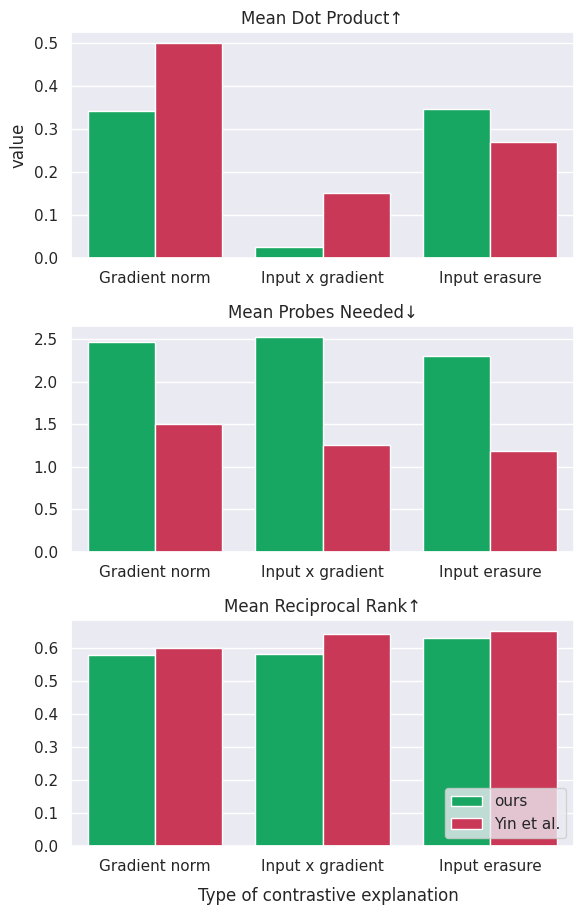

In [7]:
plot_metrics_comparison(all_measurements_df)

### 5. Analyze results at phenomenon level

In [8]:
phenomena = [
    "anaphor agreement",
    "argument structure",
    "determiner noun agreement",
    "npi licensing",
    "subject verb agreement",
]

values = []

for phenomenon in phenomena:
    measurements_phenomenon = pd.DataFrame(pd.read_json(f'../results/averaged_metrics_{phenomenon.replace(" ", "_")}.json', typ='dictionary')).reset_index()
    measurements_phenomenon = measurements_phenomenon.rename({"index": "metric", 0: "value"}, axis=1)
    values.append([round(val, 3) for val in measurements_phenomenon["value"].values])

measurements_phenomenon = preprocess_results(measurements_phenomenon)
measurements_phenomenon = measurements_phenomenon.set_index(["constrastive explanation", "alignment metric"], append=True).swaplevel(0,1,axis=0)
measurements_phenomena = measurements_phenomenon.drop("value", axis=1)

for phenomenon_index in range(len(phenomena)):
    measurements_phenomena[phenomena[phenomenon_index]] = values[phenomenon_index]

measurements_phenomena.to_excel("../results/metrics_per_phenomenon.xlsx")
measurements_phenomena

anaphor agreement  \
constrastive explanation   alignment metric                          
Gradient norm            0 mean dot product                  0.357   
                         1 mean probes needed                2.297   
                         2 mean reciprocal rank              0.502   
Input x gradient         3 mean dot product                  0.226   
                         4 mean probes needed                2.126   
                         5 mean reciprocal rank              0.603   
Input erasure            6 mean dot product                  0.701   
                         7 mean probes needed                2.112   
                         8 mean reciprocal rank              0.605   

                                                 argument structure  \
constrastive explanation   alignment metric                           
Gradient norm            0 mean dot product                   0.238   
                         1 mean probes needed                 1.907   
                         2 mean reciprocal rank               0.702   
Input x gradient         3 mean dot product                  -0.419   
                         4 mean probes needed                 4.473   
                         5 mean reciprocal rank               0.326   
Input erasure            6 mean dot product                   0.012   
                         7 mean probes needed                 3.540   
                         8 mean reciprocal rank               0.454   

                                                 determiner noun agreement  \
constrastive explanation   alignment metric                                  
Gradient norm            0 mean dot product                          0.149   
                         1 mean probes needed                        4.119   
                         2 mean reciprocal rank                      0.309   
Input x gradient         3 mean dot product                          0.285   
                         4 mean probes needed                        2.809   
                         5 mean reciprocal rank                      0.524   
Input erasure            6 mean dot product                          0.176   
                         7 mean probes needed                        2.426   
                         8 mean reciprocal rank                      0.655   

                                                 npi licensing  \
constrastive explanation   alignment metric                      
Gradient norm            0 mean dot product              0.353   
                         1 mean probes needed            1.675   
                         2 mean reciprocal rank          0.687   
Input x gradient         3 mean dot product             -2.273   
                         4 mean probes needed            2.216   
                         5 mean reciprocal rank          0.567   
Input erasure            6 mean dot product              0.053   
                         7 mean probes needed            2.550   
                         8 mean reciprocal rank          0.459   

                                                 subject verb agreement  
constrastive explanation   alignment metric                              
Gradient norm            0 mean dot product                       0.555  
                         1 mean probes needed                     1.639  
                         2 mean reciprocal rank                   0.773  
Input x gradient         3 mean dot product                       0.901  
                         4 mean probes needed                     1.788  
                         5 mean reciprocal rank                   0.741  
Input erasure            6 mean dot product                       0.535  
                         7 mean probes needed                     1.621  
                         8 mean reciprocal rank                   0.783